# FISH MARKET DATASET
The aim of this study is to 
estimate weight of the fish indivuduals from their measurements through using linear regression model.

In [1]:
###Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset=pd.read_csv('Fish.csv')

In [3]:
dataset

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


Based on Species,Length1,Length2,Length3 and Height We want to predict Fish Weight

In [4]:
# Checking the shape of the dataset
dataset.shape

(159, 7)

In [5]:
dataset['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [6]:
dataset[['Species','Weight']].head(20)

,Species,Weight
0,Bream,242.0
1,Bream,290.0
2,Bream,340.0
3,Bream,363.0
4,Bream,430.0
5,Bream,450.0
6,Bream,500.0
7,Bream,390.0
8,Bream,450.0
9,Bream,500.0


In [7]:
dataset.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
dataset

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [8]:
###Checking for missing values
dataset.isnull().sum()

Species      0
Weight       0
LengthVer    0
LengthDia    0
LengthCro    0
Height       0
Width        0
dtype: int64

In [9]:
dataset.dtypes

Species       object
Weight       float64
LengthVer    float64
LengthDia    float64
LengthCro    float64
Height       float64
Width        float64
dtype: object

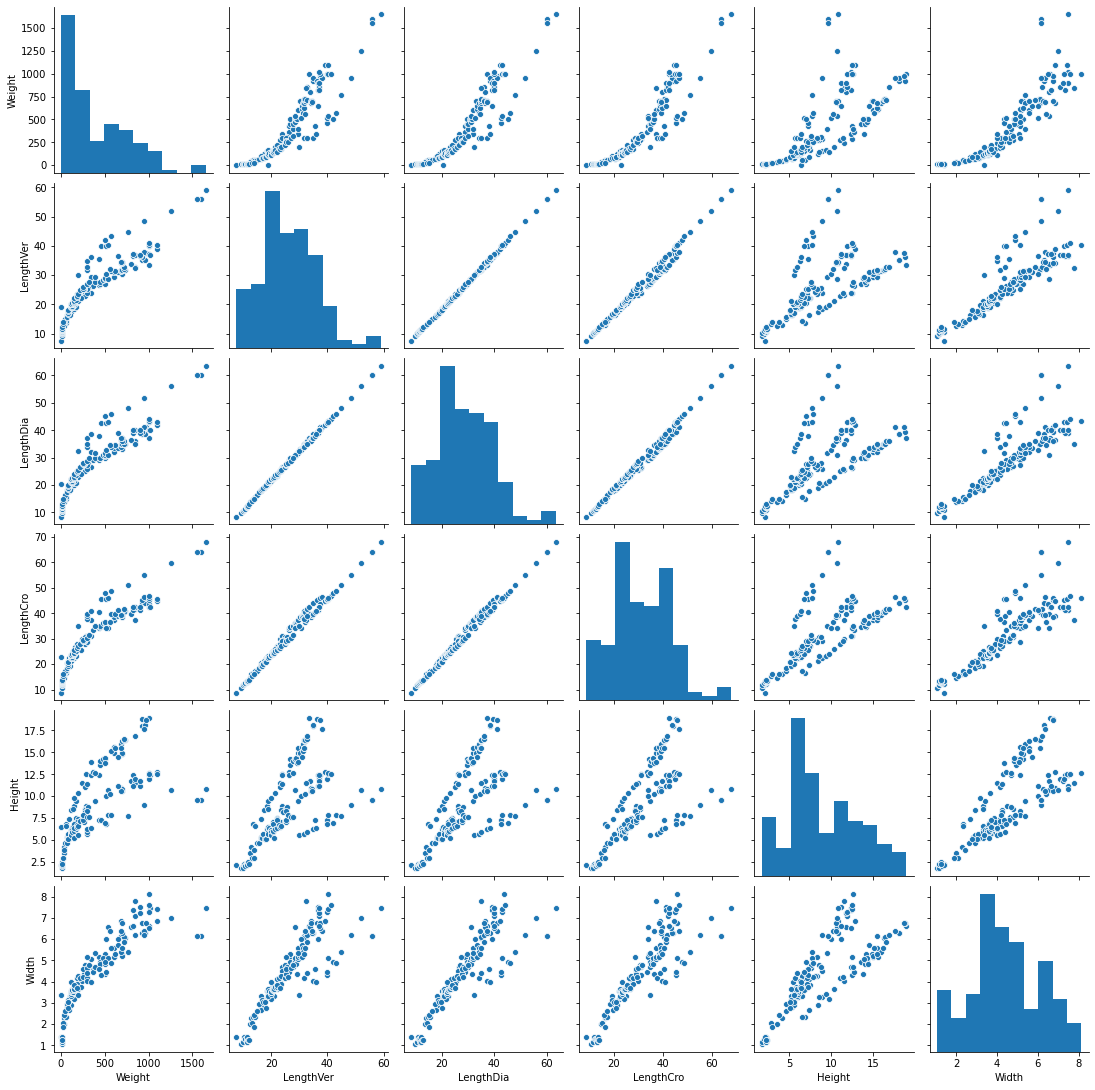

In [10]:
sns.pairplot(dataset)

In [11]:
data_corr=dataset.corr()
data_corr

,Weight,LengthVer,LengthDia,LengthCro,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
LengthVer,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
LengthDia,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
LengthCro,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

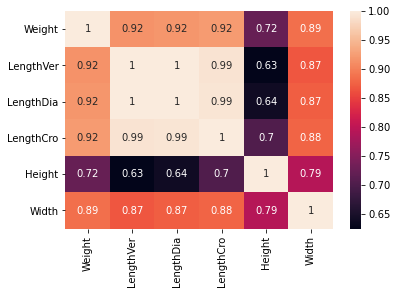

In [12]:
sns.heatmap(dataset.corr(),annot=True)

<AxesSubplot:xlabel='Weight'>

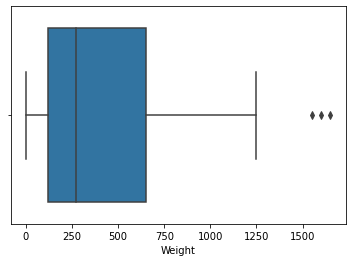

In [13]:
### Analysing and Dealing with Outliers
sns.boxplot(x=dataset['Weight'])

In [14]:
dfw = dataset['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [15]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

In [16]:
dataset.columns

Index(['Species', 'Weight', 'LengthVer', 'LengthDia', 'LengthCro', 'Height',
       'Width'],
      dtype='object')

<AxesSubplot:xlabel='LengthVer'>

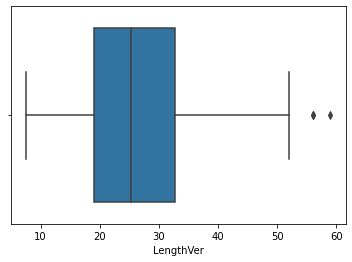

In [17]:
sns.boxplot(x=dataset['LengthVer'])

In [18]:
dflv = dataset['LengthVer']
dflv_Q1 = dflv.quantile(0.25)
dflv_Q3 = dflv.quantile(0.75)
dflv_IQR = dflv_Q3 - dflv_Q1
dflv_lowerend = dflv_Q1 - (1.5 * dflv_IQR)
dflv_upperend = dflv_Q3 + (1.5 * dflv_IQR)

dflv_outliers = dflv[(dflv < dflv_lowerend) | (dflv > dflv_upperend)]
dflv_outliers

142    56.0
143    56.0
144    59.0
Name: LengthVer, dtype: float64

<AxesSubplot:xlabel='LengthDia'>

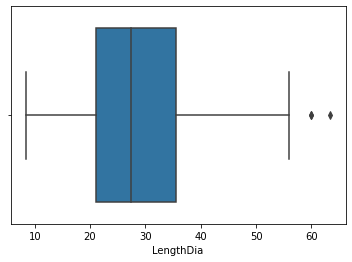

In [19]:
sns.boxplot(x=dataset['LengthDia'])

In [20]:
dfdia = dataset['LengthDia']
dfdia_Q1 = dfdia.quantile(0.25)
dfdia_Q3 = dfdia.quantile(0.75)
dfdia_IQR = dfdia_Q3 - dfdia_Q1
dfdia_lowerend = dfdia_Q1 - (1.5 * dfdia_IQR)
dfdia_upperend = dfdia_Q3 + (1.5 * dfdia_IQR)

dfdia_outliers = dfdia[(dfdia < dfdia_lowerend) | (dfdia > dfdia_upperend)]
dfdia_outliers

142    60.0
143    60.0
144    63.4
Name: LengthDia, dtype: float64

<AxesSubplot:xlabel='LengthCro'>

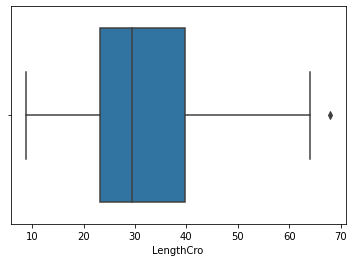

In [21]:
sns.boxplot(x=dataset['LengthCro'])

In [22]:
dfcro = dataset['LengthCro']
dfcro_Q1 = dfcro.quantile(0.25)
dfcro_Q3 = dfcro.quantile(0.75)
dfcro_IQR = dfcro_Q3 - dfcro_Q1
dfcro_lowerend = dfcro_Q1 - (1.5 * dfcro_IQR)
dfcro_upperend = dfcro_Q3 + (1.5 * dfcro_IQR)

dfcro_outliers = dfcro[(dfcro < dfcro_lowerend) | (dfcro > dfcro_upperend)]
dfcro_outliers

144    68.0
Name: LengthCro, dtype: float64

# Outliers of the Dataset

In [23]:
dataset[142:145]

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In our dataset, index number 142, 143 and 144 are the outliers.

In this study I am going to erase these 3 data entries from my dataset.


Reanalysing Basic Statistics After Eliminating Outliers

In [24]:
dataset1=dataset.drop([142,143,144])
dataset1.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
LengthVer,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
LengthDia,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
LengthCro,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


Now our Outlier has been removed from what we have analysed earlier

PREPARING THE MACHINE LEARNING MODEL


SEPARATING THE DEPENDENT AND INDEPENDENT VARIABLES

In [25]:
#Dependent Variables
X=dataset1.iloc[:,2:7]
y=dataset1['Weight']

In [26]:
X

,LengthVer,LengthDia,LengthCro,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [27]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 156, dtype: float64

Dividing Dataset into Train and Test Datasets

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [29]:
X_train.shape

(124, 5)

In [30]:
print('How many samples we have in our test and  training data')
print(' X_train :', np.shape(X_train))
print(' X_test  :', np.shape(X_test))
print('y_train  :', np.shape(y_train))
print('y_test   :',np.shape(y_test))

How many samples we have in our test and  training data
 X_train : (124, 5)
 X_test  : (32, 5)
y_train  : (124,)
y_test   : (32,)


In [31]:
### Applying Linear Regression Model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

My Model Linear Regression Formula

In [32]:
##My Model paramters
print('Model Intercept :',reg.intercept_)
print('Model coefficients :',reg.coef_)

Model Intercept : -441.0088725388172
Model coefficients : [ 89.93843031 -32.68619524 -37.53063323  33.07275974  60.72005923]


In [33]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')

y = -441.01 + 89.94*X1 -32.69*X2 -37.53*X3 + 33.07*X4 + 60.72*X5


PREDICTION BY USING THE MODEL

PREDICTING WEIGHTS OF THE TRAIN DATASET

In [34]:
y_head=reg.predict(X_train)
y_head

array([ 202.90452767,  885.91891353,  942.33274059,  702.05036955,
        942.59702197,  427.99145379, -150.88081432,  916.52520124,
        586.70156842,  705.94716872,  873.17227904,  791.38911847,
        501.30131283,  579.17897951,  -78.20743812,  356.3589173 ,
        556.19355965,   81.46095539,  623.16973397,  214.39165686,
        441.71254524,  182.34732588,  443.17900718,  167.54787901,
         32.77781374,  810.85922684, -158.0397093 ,  666.53918739,
        500.74918444,  535.98775854,  168.60962373,  937.48919052,
        239.22983111,  836.53179174,  369.64822026,  442.89429899,
        493.22024413,  314.50718501,  762.94546735,  213.4966049 ,
        289.6453122 ,   90.3951257 ,  147.92945773,  192.51371361,
         43.48615293,  -16.50017721,  808.73836151,  219.98974829,
        360.18212833,  180.27793414,  522.99905689,  861.01794789,
        853.61524195,  362.32655458,   94.02219808,  133.51160735,
        712.50103494,  -87.06663973,  667.31969018,  635.11235

Analysing the Success of the Model from Train Dataset and Predictions

In [35]:
from sklearn.metrics import r2_score
r2_score(y_train,y_head)

0.9116039087262157

But if we change random_state our train and test samples will be different and our model's score will be different.
In order to eliminate this change I will use cross validation:

In [36]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(reg,X_train,y_train,cv=10,scoring='r2')
print(cv_score)

[0.81965553 0.91733889 0.90970988 0.96003833 0.93655595 0.86878097
 0.91955783 0.8518532  0.84071059 0.81121078]


There are 10 different versions of r2 scores using my model (reg).
If I get the average of this I can achieve cross validated r2 score of my training model:

In [37]:
cv_score.mean()

0.8835411966576624

Using Trained Model and Test Dataset to Estimate Weights:

In [38]:
y_pred=reg.predict(X_test)
y_pred

array([ 746.03461547,   44.69857741,  282.2872662 ,  777.20820933,
        -74.80228919,  159.71794772,  569.63773532,  651.09761494,
        349.70791715, -163.68407419, -160.7129609 ,   92.2355465 ,
        211.23403725,  181.91450982,  165.03422979,  445.30901505,
        860.29106155,  589.45595321,  626.12814176,  791.62920091,
        288.03559932, -184.53021398, -209.11977418,  252.49273758,
        187.80124711,  310.23118893,  169.17629085,  130.16735576,
        764.04634258,  206.46227307,  378.04381705,  666.43412998])

Analysing the Success of the Trained Model from Test Dataset and Predictions:

In [39]:
print(r2_score(y_test,y_pred))

0.8671964388742472


 VISUALISATION OF THE PREDICTIONS

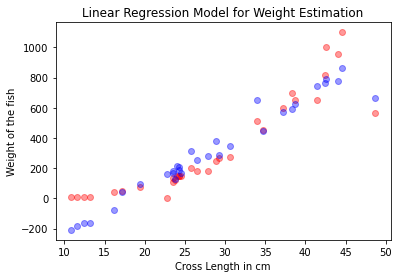

In [40]:
plt.scatter(X_test['LengthCro'],y_test,color='red',alpha=0.4)
plt.scatter(X_test['LengthCro'],y_pred,color='blue',alpha=0.4)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

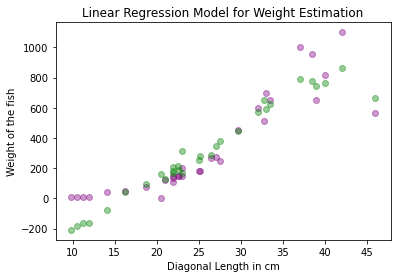

In [41]:
plt.scatter(X_test['LengthDia'],y_test,color='purple',alpha=0.4)
plt.scatter(X_test['LengthDia'],y_pred,color='green',alpha=0.4)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

In [42]:
dataset.columns

Index(['Species', 'Weight', 'LengthVer', 'LengthDia', 'LengthCro', 'Height',
       'Width'],
      dtype='object')

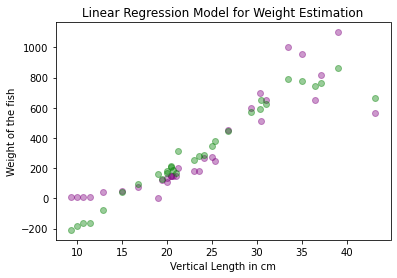

In [43]:
plt.scatter(X_test['LengthVer'],y_test,color='purple',alpha=0.4)
plt.scatter(X_test['LengthVer'],y_pred,color='green',alpha=0.4)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

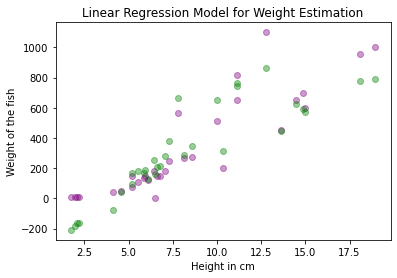

In [44]:
plt.scatter(X_test['Height'],y_test,color='purple',alpha=0.4)
plt.scatter(X_test['Height'],y_pred,color='green',alpha=0.4)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

Text(0.5, 1.0, 'Linear Regression Model for Weight Estimation')

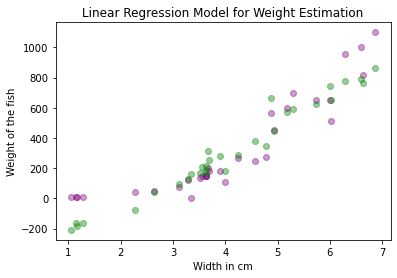

In [45]:
plt.scatter(X_test['Width'],y_test,color='purple',alpha=0.4)
plt.scatter(X_test['Width'],y_pred,color='green',alpha=0.4)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')

COMPARING REAL AND PREDICTED WEIGHTS

In [46]:
y_pred1=pd.DataFrame(y_pred,columns=['Estimated Weight'])
y_pred1.head(10)

,Estimated Weight
0,746.034615
1,44.698577
2,282.287266
3,777.208209
4,-74.802289
5,159.717948
6,569.637735
7,651.097615
8,349.707917
9,-163.684074


In [47]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,Weight
0,650.0
1,51.5
2,180.0
3,955.0
4,40.0


In [48]:
#Concat Both DataFrame
ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew

,Weight,Estimated Weight
0,650.0,746.034615
1,51.5,44.698577
2,180.0,282.287266
3,955.0,777.208209
4,40.0,-74.802289
5,0.0,159.717948
6,600.0,569.637735
7,514.0,651.097615
8,272.0,349.707917
9,9.8,-163.684074


From the results above, one can see there is a tendency towards errorous estimations when the weight is small.

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

13604.81510051692

# MEDIA COMPANY DATASET

Problem Statement:
A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

Approach:
We are concerned about determining the driver variable for show viewership. This is the case of pridiction rather than projection where we are more interested in predicting the key driver variables and their impact rather than forcasting the results.

First we will list down the potential reasons for the decline in viewershp.

The potential reasons could be:

Decline in the number of people coming to the platform
Fewer people watching the video
A Decrease in marketing spend?
Competitive shows, e.g. cricket/ IPL
Special holidays
Twist in the story
Data
We have been given data for the period of 1 March 2017 to 19 May 2017.
With Columns as
Views_show : Number of times the show was viewed
Visitors : Number of visitors who browsed the platform, but not necessarily watched a video.
Views_platform : Number of times a video was viewed on the platform
Ad_impression : Proxy for marketing budget. Represents number of impressions generated by ads
Cricket_match_india: If a cricket match was being played. 1 indicates match on a given day, 0 indicates there wasn't
Character_A : Describes presence of Character A. 1 indicates character A was in the episode, 0 indicates she/he wasn't

In [50]:
media_data=pd.read_csv('mediacompany (1).csv')

In [51]:
media_data

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN
...,...,...,...,...,...,...,...,...
75,5/15/2017,313945,1808684,2226788,1398052759,1,0,NaN
76,5/16/2017,185689,1814227,2199844,1311961223,1,0,NaN
77,5/17/2017,142260,1755803,2225752,1248266254,1,0,NaN
78,5/18/2017,135871,1749654,2302789,1284859759,1,0,NaN


READING AND UNDERSTANDING THE DATA

In [52]:
media_data.shape

(80, 8)

In [53]:
media_data.drop('Unnamed: 7',inplace=True,axis=1)

In [54]:
media_data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [55]:
# Checking Duplicates
sum(media_data.duplicated(subset ='Date')) == 0
# So there is no duplicate values

True

DATA  INSPECTION

In [56]:
media_data.info()
# Here when we inspected Date variable should be converted into  DateTime variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [57]:
media_data.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


DATA CLEANING

In [58]:
media_data.isnull().sum()

Date                   0
Views_show             0
Visitors               0
Views_platform         0
Ad_impression          0
Cricket_match_india    0
Character_A            0
dtype: int64

In [59]:
media_data.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A'],
      dtype='object')

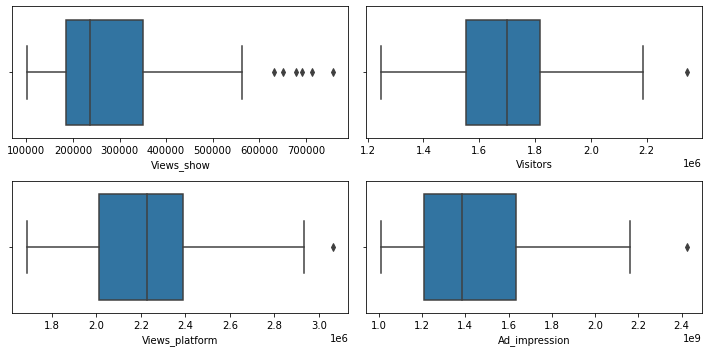

In [60]:
#Outlier Analysis
fig,axs=plt.subplots(2,2, figsize = (10,5))
plt1=sns.boxplot(media_data['Views_show'],ax=axs[0,0])
plt2=sns.boxplot(media_data['Visitors'],ax=axs[0,1])
plt3=sns.boxplot(media_data['Views_platform'],ax=axs[1,0])
plt4=sns.boxplot(media_data['Ad_impression'],ax=axs[1,1])

plt.tight_layout()

from my analysis there are outliers in the  dataset in column Like Views_show,Visitors,Views_platform,Ad_impression

DATA PREPARATION

In [61]:
# Converting  date  to Pandas datetime format
media_data['Date']= pd.to_datetime(media_data['Date'], dayfirst =  False)

In [62]:
# Checking that the transformation is applied in what format
media_data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


Deriving Matrices

In [63]:
# Let's derive day of week column from date 
media_data['DayofWeek']=media_data['Date'].dt.dayofweek

In [64]:
media_data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,DayofWeek
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6


EXPLORATOR DATA ANALYSIS

<AxesSubplot:xlabel='Views_show'>

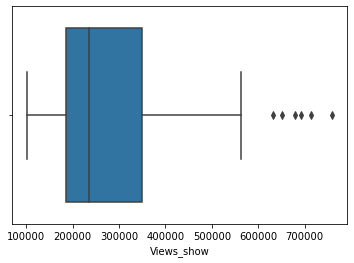

In [65]:
# Target Variable
# View Show
sns.boxplot(media_data['Views_show'])

UNIVARIATE ANALYSIS


DATE

<AxesSubplot:xlabel='Date'>

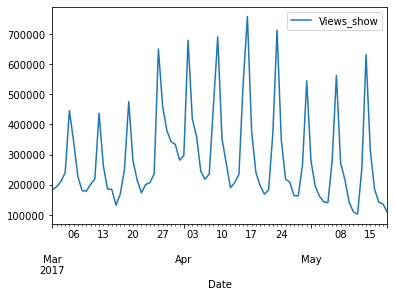

In [66]:
#Days vs Views_show
media_data.plot.line(x='Date',y='Views_show')
# From our observation we can there is pattern in the plot.In April and May Month the views is approximately slightly larger 
#than March because It is the month of Summer 

<AxesSubplot:xlabel='DayofWeek', ylabel='Views_show'>

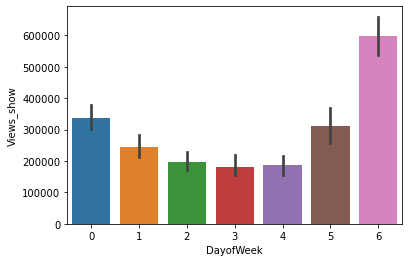

In [67]:
#Day Of Week
sns.barplot(data=media_data,x='DayofWeek',y='Views_show')

In [68]:
# Inference
# we can see that Views are more on 'Sunday' and 'Saturday'(weekends) and decline on subsequent days.
# Hence we can think of another matrix "Weekend" that is 1 for weekends and 0 for weekdays.

In [69]:
di={5:1,6:1,0:0,1:0,2:0,3:0,4:0}
media_data['Weekend']=media_data['DayofWeek'].map(di)

In [70]:
media_data.head(25)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,DayofWeek,Weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,1
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,0,0
6,2017-03-07,227313,1363579,1821742,1113811802,0,0,1,0
7,2017-03-08,180313,1353483,1795456,1083475096,0,0,2,0
8,2017-03-09,178800,1345428,1794157,1067636147,0,0,3,0
9,2017-03-10,201180,1344540,1834967,1081234843,0,0,4,0


Weekend

<AxesSubplot:xlabel='Weekend', ylabel='Views_show'>

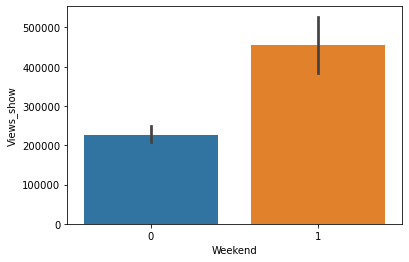

In [71]:
sns.barplot(data=media_data,x='Weekend',y='Views_show')

Viewership is high on Weekends

# Ad Impression

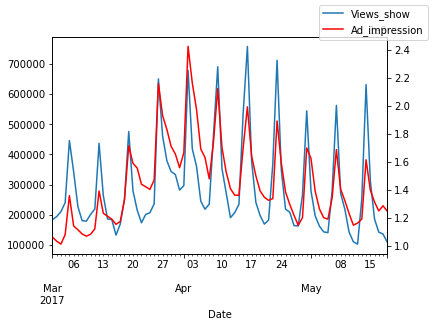

In [72]:
#plot for Date vs Views_show and days vs Ad impression
ax=media_data.plot(x='Date',y='Views_show',legend=False)
ax2=ax.twinx()
media_data.plot(x='Date',y='Ad_impression',ax=ax2,legend=False,color='r')
ax.figure.legend()

In [73]:
media_data[['Date','Weekend']].head(5)

,Date,Weekend
0,2017-03-01,0
1,2017-03-02,0
2,2017-03-03,0
3,2017-03-04,1
4,2017-03-05,1


<AxesSubplot:xlabel='Ad_impression', ylabel='Views_show'>

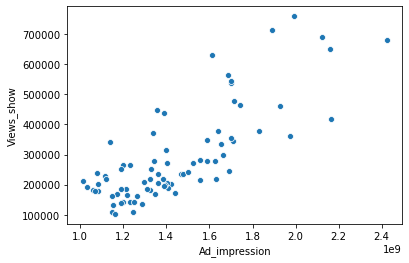

In [74]:
sns.scatterplot(data=media_data,x='Ad_impression',y='Views_show')

 we can see that the views as well as ad impressions show a weekly pattern.

# VISITORS

<AxesSubplot:xlabel='Visitors', ylabel='Views_show'>

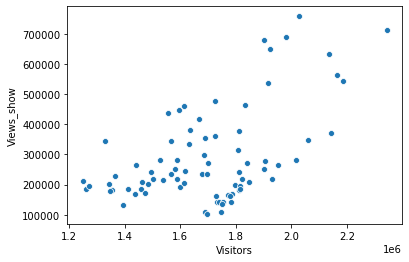

In [75]:
#Plotting Visitors versus Views_Show
sns.scatterplot(x='Visitors',y='Views_show',data=media_data)

 Inference: Show views are some what proportionately related to Visitors

In [76]:
media_data.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'DayofWeek', 'Weekend'],
      dtype='object')

# VIEWS_PLATFORM

<AxesSubplot:xlabel='Views_platform', ylabel='Views_show'>

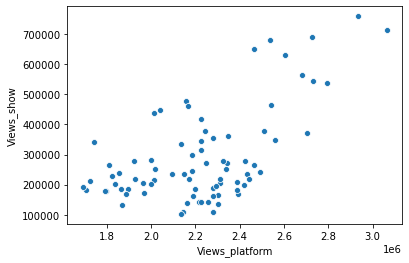

In [77]:
##plotting Views_platform versus  Visitors
sns.scatterplot(x='Views_platform',y='Views_show',data=media_data)

 Inference: Show views are some what proportionately related to Platform views

In [78]:
media_data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,DayofWeek,Weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,1


# CRICKET MATCH

<AxesSubplot:xlabel='Cricket_match_india', ylabel='Views_show'>

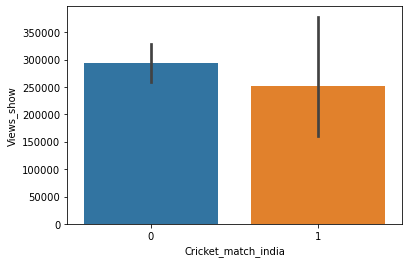

In [79]:
sns.barplot(x='Cricket_match_india',y='Views_show',data=media_data)

Show views declined there is a cricket match

In [80]:
CHARACTER_A

NameError: name 'CHARACTER_A' is not defined

In [ ]:
sns.barplot('Character_A',y='Views_show',data=media_data)

Presence of Character A improves show viewership

# MODEL BUILDING

In [ ]:
#Rescaling the  features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
nums_vars=['Views_show','Visitors','Views_platform','Ad_impression']
media_data[nums_vars]=scaler.fit_transform(media_data[nums_vars])

In [ ]:
media_data.head()

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated
sns.heatmap(media_data.corr(),annot=True)

Running first model (lm1) Visitors, weekend

In [ ]:
# Putting Feature Variable to  X
X=media_data[['Visitors','Weekend']]

#Putting response variable to y
y=media_data['Views_show']

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X,y)

In [ ]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

We can see that Weekend and Visitors both are significant

Running second model (lm2) visitors, weekend & Character_A

In [ ]:
# Putting  feature variable to X
X=media_data[['Visitors','Weekend','Character_A']]

#Putting response variable to Y
y=media_data['Views_show']

In [ ]:
import statsmodels.api as sm

X=sm.add_constant(X)

lm_2=sm.OLS(y,X).fit()

print(lm_2.summary())

 we have seen that views of today effects views of tomorrow. So to take that in account we will create a Lag variable

In statistics and econometrics, a distributed lag model is a model 
for time series data in which a regression equation is used to predict current values of a dependent variable 
based on both the current values of an explanatory variable and the lagged (past period) values of this explanatory variable.

In [ ]:
#Creating Lag Variable
media_data['Lag_Views']=np.roll(media_data['Views_show'],1)

In [ ]:
media_data.head(12)

In [ ]:
media_data.Lag_Views[0]=0


In [ ]:
media_data.head()

Running third model with Visitors,Weekend,Character_A,Lag_Views

In [ ]:

#Putting Feature Variable to X
X=media_data[['Visitors','Weekend','Character_A','Lag_Views']]

#Putting response variable to y
y=media_data['Views_show']

In [ ]:
import statsmodels.api as sm

X=sm.add_constant(X)

lm_3=sm.OLS(y,X).fit()
print(lm_3.summary())

Inference:It leaves visitor insignificant

Running fourth model with Character_A,Weekend & Views_platform

In [ ]:

#Putting Feature Variable to X
X=media_data[['Weekend','Character_A','Views_platform']]

#Putting response variable to y
y=media_data['Views_show']

In [ ]:
import statsmodels.api as sm

X=sm.add_constant(X)

lm_4=sm.OLS(y,X).fit()
print(lm_4.summary())

Running fifth model (lm5) Character_A, weekend & Visitors

In [ ]:
#Putting Feature Variable to X
X=media_data[['Character_A','Weekend','Visitors']]

#Putting response variable to y
y=media_data['Views_show']

In [ ]:
import statsmodels.api as sm

X=sm.add_constant(X)

lm_5=sm.OLS(y,X).fit()
print(lm_5.summary())

Running sixth model (lm6) Character_A, weekend, Visitors & Ad_impressions

In [ ]:
#Putting Feature Variable to X
X=media_data[['Weekend','Character_A','Visitors','Ad_impression']]

#Putting response variable to y
y=media_data['Views_show']

In [ ]:
import statsmodels.api as sm

X=sm.add_constant(X)

lm_6=sm.OLS(y,X).fit()
print(lm_6.summary())

Inference:In this analysis Visitors and Character_A is insignificant

Running seventh model (lm7) Character_A, weekend & Ad_impressions

In [ ]:
#Putting Feature Variable to X
X=media_data[['Character_A','Weekend','Ad_impression']]

#Putting response variable to y
y=media_data['Views_show']

In [ ]:
import statsmodels.api as sm

X=sm.add_constant(X)

lm_7=sm.OLS(y,X).fit()
print(lm_7.summary())

Inference:Here we can see that there is pattern in the plot.With Day as Weekend Ad_impression 
will grow as more Visitors will come

In [ ]:
#Ad impression in million
media_data['ad_impression_million'] = media_data['Ad_impression']/1000000

In [ ]:
media_data.head()

Running eight model(lm8) Character_A, weekend, Visitors, ad_impressions_million & Cricket_match_india

In [ ]:
X=media_data[['Character_A','Weekend','Visitors','ad_impression_million','Cricket_match_india']]

y=media_data['Views_show']

In [ ]:
import statsmodels.api as sm

X=sm.add_constant(X)

lm_8=sm.OLS(y,X).fit()
print(lm_8.summary())

Running nine model (lm9) Character_A, weekend & ad_impressions_million

In [ ]:
# Putting feature variable to X
X = media_data[['Weekend','Character_A','ad_impression_million']]

# Putting response variable to y
y = media_data['Views_show']

In [ ]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_9 = sm.OLS(y,X).fit()
print(lm_9.summary())

In [ ]:
#Making prediction with lm_9
X=media_data[['Weekend','Character_A','ad_impression_million']]
X=sm.add_constant(X)
predicted_views=lm_9.predict(X)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(media_data.Views_show,predicted_views)
r2_score=r2_score(media_data.Views_show,predicted_views)

In [ ]:
print('mse :',mse)
print('r2_score:',r2_score)

In [ ]:
#Actual vs Predicted Values
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media_data.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)

In [ ]:

# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media_data.Views_show-predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

In [ ]:
# Making predictions using the model
X = media_data[['Weekend','Character_A','Visitors']]
X = sm.add_constant(X)
Predicted_views = lm_5.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media_data.Views_show, Predicted_views)
r_squared = r2_score(media_data.Views_show, Predicted_views)

In [ ]:
print('mse:',mse)
print('r_squared:',r_squared)

In [ ]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media_data.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)

In [ ]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media_data.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)           # Y-label

Ad Impressions and Character A as the driver variables that could explain the viewership pattern. 

Based on industry experience, ad impressions are directly proportional to the marketing budget.

Thus, by increasing the marketing budget, a better viewership could be achieved. 
Similarly, Character A’s absence and presence created a significant change in show viewership.

Character A’s presence brings viewers to the show. Thus, these two variables could be acted upon to improve show viewership.


# USA HOUSING DATASET

In [2]:
dataset=pd.read_csv('USA_Housing.csv')

In [3]:
dataset

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
dataset.shape

(5000, 7)

In [5]:
dataset.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [6]:
dataset['Address'][0]

'208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

In [7]:
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
dataset=dataset.rename(columns={'Area Population':'Population','Avg. Area Income':'Income',
                               'Avg. Area House Age':'House Age','Avg. Area Number of Rooms':'Rooms',
                                'Avg. Area Number of Bedrooms':'No of Bedrooms'})

In [9]:
dataset

,Income,House Age,Rooms,No of Bedrooms,Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [10]:
# Checking the median value of the No of Bedrooms
dataset['No of Bedrooms'].median()

4.05

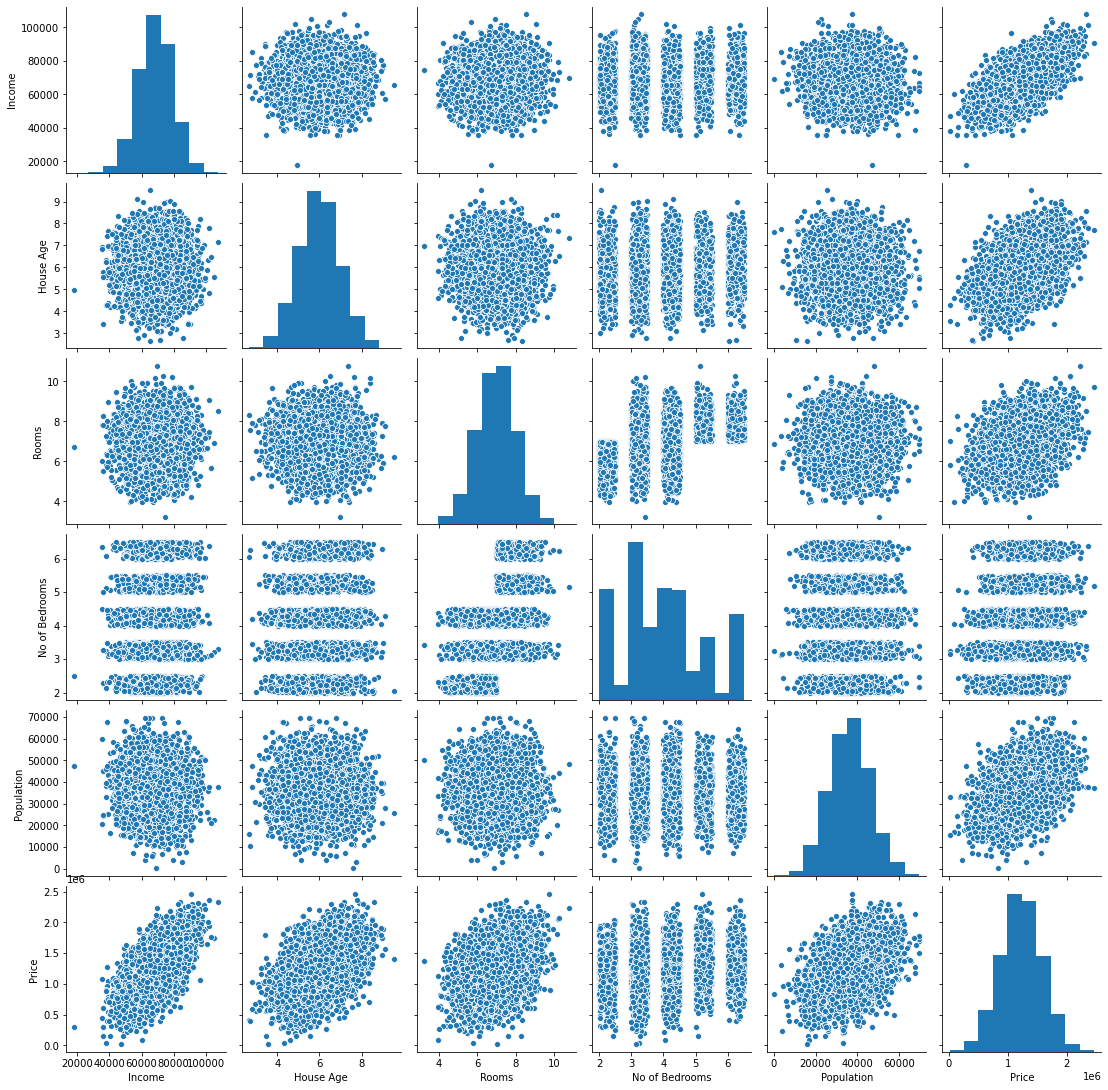

In [11]:
sns.pairplot(dataset)

<AxesSubplot:>

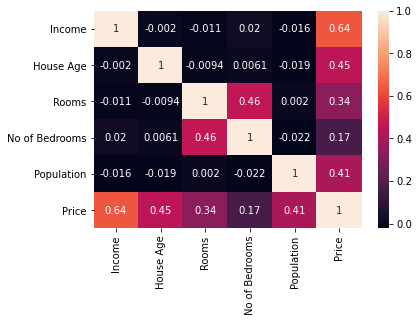

In [12]:
sns.heatmap(dataset.corr(),annot=True)

<AxesSubplot:xlabel='Price'>

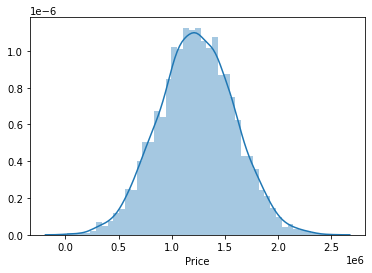

In [13]:
sns.distplot(dataset['Price'])

<AxesSubplot:xlabel='Population'>

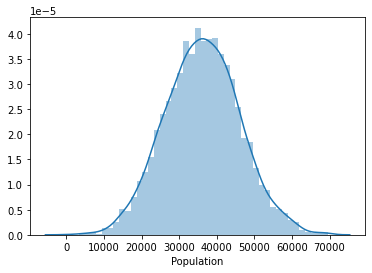

In [14]:
sns.distplot(dataset['Population'])

In [15]:
dataset=dataset.drop('Address',axis=1)

In [16]:
dataset

,Income,House Age,Rooms,No of Bedrooms,Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          5000 non-null   float64
 1   House Age       5000 non-null   float64
 2   Rooms           5000 non-null   float64
 3   No of Bedrooms  5000 non-null   float64
 4   Population      5000 non-null   float64
 5   Price           5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [36]:
X=dataset[['Income','House Age','Rooms','No of Bedrooms','Population']]
y=dataset['Price']

In [37]:
X

,Income,House Age,Rooms,No of Bedrooms,Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [38]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [40]:
X_train.shape

(3750, 5)

In [41]:
y_train.shape

(3750,)

In [42]:
# Creating and Training the model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [43]:
import statsmodels.api as sm

X_train=sm.add_constant(X_train)

mod=sm.OLS(y_train,X_train)

lm_1=mod.fit()

print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     8364.
Date:                Mon, 21 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:01:34   Log-Likelihood:                -48524.
No. Observations:                3750   AIC:                         9.706e+04
Df Residuals:                    3744   BIC:                         9.710e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.645e+06   1.99e+04   -132.

Inference:We can see that No of Bedrooms is insignificant in this statement

In [45]:
dataset.corr()

,Income,House Age,Rooms,No of Bedrooms,Population,Price
Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
No of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


# Three Thing that I learned from my analysis in this data
1.Strong multicollinearity

2.No of Bedrooms is not normally Distributed

3.From the visualization point of view we can see that points are cluster in one place thereby making it difficult.



In [53]:
### Handling Multicollinearity
# Importing library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    
    # Calculating VIF
    vif=pd.DataFrame()
    vif['variables']=X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [56]:
X=dataset.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Income,29.650899
1,House Age,27.447775
2,Rooms,45.257291
3,No of Bedrooms,14.537873
4,Population,12.825450
